In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
from keras.models import Sequential
from keras.layers import Dense

/local_data/env-py3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/local_data/env-py3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
import numpy as np

In [6]:
from scipy.interpolate import griddata

## From $\mathbb{R}^p \mapsto \mathbb{R}^2$

In [7]:
from sklearn.manifold import TSNE

In [8]:
from sklearn.datasets import make_blobs

In [9]:
n = 1000
p = 5

In [10]:
X, z = make_blobs(n, p)

In [14]:
print(X[:5])

[[ -8.73840634  -8.38749963   7.54399579   4.37469149  -4.28758491]
 [  4.11599299  -6.60317361   2.84947227  -0.38889362   7.14749154]
 [-10.1000563   -7.84956619   6.58004417   6.40471676  -4.46456752]
 [  4.57156002  -6.7576524    4.38138929  -1.46876608   6.79986585]
 [  4.93431058  -6.29209061   3.28707618   0.24516827   4.29148783]]


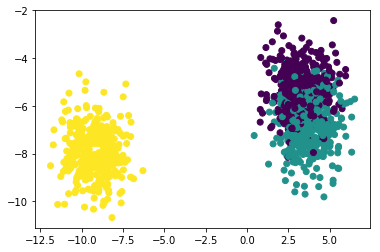

In [15]:
plt.scatter(X[:, 0], X[:,1], c=z)
pass

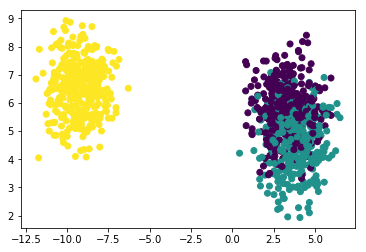

In [16]:
plt.scatter(X[:, 0], X[:,2], c=z)
pass

In [20]:
tsne = TSNE()

In [21]:
y = tsne.fit_transform(X)

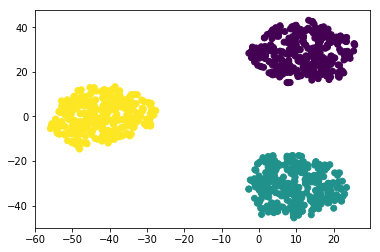

In [22]:
plt.scatter(y[:, 0], y[:, 1], c=z)
pass

In [18]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test, z_train, z_test = train_test_split(X, y, z)

In [24]:
X_train.shape

(750, 5)

In [25]:
X_test.shape

(250, 5)

In [159]:
model = Sequential()
model.add(Dense(64, input_shape=(p,), activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(2))
model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])

In [160]:
history = model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

In [161]:
loss = history.history['loss']

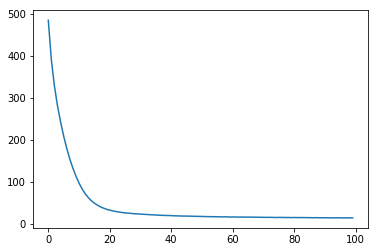

In [162]:
plt.plot(loss)
pass

In [163]:
yhat = model.predict(X_test)

In [164]:
y_test[:10]

array([[ 30.938028 ,  -3.3683543],
       [-19.416449 ,  -5.677482 ],
       [-10.91341  ,  29.024633 ],
       [-31.436213 ,  -3.6758327],
       [  1.154443 ,  25.543152 ],
       [ 36.304516 ,  -6.4880934],
       [-36.76446  , -24.376814 ],
       [  5.523195 ,  28.839512 ],
       [ 32.52594  , -17.032158 ],
       [ 13.4884615,  38.536453 ]], dtype=float32)

In [165]:
yhat[:10]

array([[ 29.332975  ,  -2.0263205 ],
       [-15.619554  ,  -8.13452   ],
       [ -3.8422937 ,  28.82447   ],
       [-23.941439  , -21.785645  ],
       [  1.1656561 ,  25.969818  ],
       [ 35.858955  ,  -8.951338  ],
       [-22.029089  , -12.487848  ],
       [  0.15421107,  30.837141  ],
       [ 30.28536   , -16.712551  ],
       [  9.762384  ,  39.024746  ]], dtype=float32)

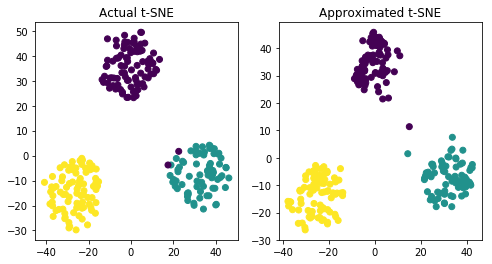

In [167]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.scatter(y_test[:, 0], y_test[:, 1], c=z_test)
plt.title('Actual t-SNE')
plt.subplot(122)
plt.scatter(yhat[:, 0], yhat[:, 1], c=z_test)
plt.title('Approximated t-SNE')
pass